<a href="https://colab.research.google.com/github/hima0502/plant-disease-detection/blob/main/plant_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

👉 Please upload kaggle.json file (from Kaggle API)


Saving kaggel.json to kaggel (2).json
✅ Found file: kaggel (2).json
✅ Kaggle API setup complete!
Dataset URL: https://www.kaggle.com/datasets/emmarex/plantdisease
License(s): unknown
 95% 624M/658M [00:03<00:00, 49.3MB/s]
100% 658M/658M [00:03<00:00, 183MB/s] 
Found 16516 images belonging to 15 classes.
Found 4122 images belonging to 15 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
517/517 ━━━━━━━━━━━━━━━━━━━━ 494s 950ms/step - accuracy: 0.3734 - loss: 2.0554 - val_accuracy: 0.6912 - val_loss: 0.9708
Epoch 2/5
517/517 ━━━━━━━━━━━━━━━━━━━━ 539s 1s/step - accuracy: 0.6745 - loss: 0.9979 - val_accuracy: 0.7504 - val_loss: 0.7384
Epoch 3/5
517/517 ━━━━━━━━━━━━━━━━━━━━ 496s 957ms/step - accuracy: 0.7480 - loss: 0.7564 - val_accuracy: 0.8205 - val_loss: 0.5167
Epoch 4/5
517/517 ━━━━━━━━━━━━━━━━━━━━ 526s 1s/step - accuracy: 0.7747 - loss: 0.6579 - val_accuracy: 0.8316 - val_loss: 0.4742
Epoch 5/5
517/517 ━━━━━━━━━━━━━━━━━━━━ 480s 928ms/step - accuracy: 0.8080 - loss: 0.5737 - val_accuracy: 0.8476 - val_loss: 0.4586


✅ Model trained and saved as plant_disease_model.h5


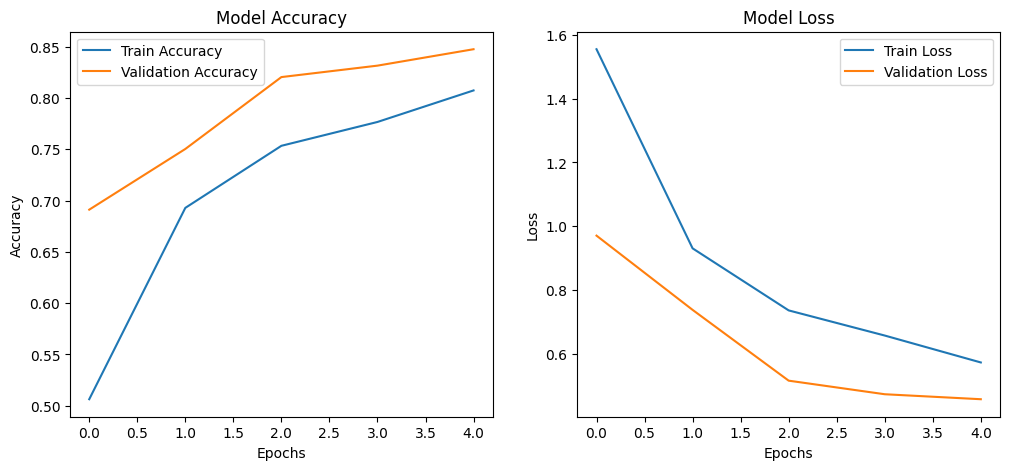

👉 Upload a leaf image for testing


Saving leaf.jpeg to leaf.jpeg
Testing on uploaded image: leaf.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
🌿 The plant is **Healthy** ✅


In [ ]:
# ==========================
# PLANT DISEASE DETECTION 🌿
# ==========================

# STEP 1: Install required libraries
!pip install tensorflow keras matplotlib numpy opencv-python kaggle

# STEP 2: Setup Kaggle API
import os
from google.colab import files

print("👉 Please upload kaggle.json file (from Kaggle API)")
uploaded = files.upload()

# ✅ Auto-detect JSON file name
kaggle_file = None
for f in uploaded.keys():
    if f.endswith(".json"):
        kaggle_file = f
        print("✅ Found file:", kaggle_file)
        break

if kaggle_file is None:
    raise Exception("❌ No kaggle.json uploaded. Please try again!")

# Move file to correct location
!mkdir -p ~/.kaggle
!cp "{kaggle_file}" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
print("✅ Kaggle API setup complete!")

# STEP 3: Download PlantVillage dataset
!kaggle datasets download -d emmarex/plantdisease
!unzip -q plantdisease.zip -d dataset

# STEP 4: Import required libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Dataset directory
data_dir = "dataset/PlantVillage"

# STEP 5: Data Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# STEP 6: Build CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# STEP 7: Train Model
history = model.fit(train_data, validation_data=val_data, epochs=5)

# STEP 8: Save Model
model.save("plant_disease_model.h5")
print("✅ Model trained and saved as plant_disease_model.h5")

# STEP 9: Plot Accuracy & Loss
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

# STEP 10: Upload and Predict Custom Image
import cv2
import numpy as np

print("👉 Upload a leaf image for testing")
uploaded = files.upload()

for filename in uploaded.keys():
    img_path = filename
    print("Testing on uploaded image:", img_path)

    # Preprocess image
    img = cv2.imread(img_path)
    img = cv2.resize(img, (128,128))
    img = img.astype('float32')/255.0
    img = np.expand_dims(img, axis=0)

    # Predict
    prediction = model.predict(img)
    class_index = np.argmax(prediction)
    class_label = list(train_data.class_indices.keys())[class_index]

    if "healthy" in class_label.lower():
        print("🌿 The plant is **Healthy** ✅")
    else:
        print(f"⚠️ The plant is affected: {class_label}")
